
<br><br>
<font face="Times New Roman">
    <div dir=ltr align=center>
        <font color=0F5298 size=7>
            Machine Learning
        </font>
        <br><br>
        <font color=2565AE size=5>
            Computer Engineering Department<br>Fall 2024
        </font>
        <br><br>
        <font color=3C99D size=5>
  Optimization Techniques on ML/DL Models
        </font>
        <br><br>
    </div>
    <br><br>
</font>



# Imported Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install keras-tuner
from keras_tuner import Hyperband, RandomSearch, BayesianOptimization

from tensorflow import argmax
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.0 MB/s eta 0:00:00


# Optimizers

## Introduction

In machine learning and deep learning, **optimizers** play a crucial role in the process of training models by updating the model’s parameters (weights and biases) to minimize the error or loss. The goal of an optimizer is to find the optimal parameter values that yield the best performance on a given task, whether that be classification, regression, or some other objective.

An optimizer works by adjusting the parameters iteratively based on the gradients of a loss function with respect to the parameters. Gradients provide direction in the parameter space, indicating how each parameter should be adjusted to reduce the loss. Optimizers use these gradients to "navigate" toward the minimum of the loss function.

## Why Optimizers Matter

Optimizers impact how quickly and effectively a model converges to a solution. The choice of optimizer can affect:
- **Training speed**: Certain optimizers are computationally efficient, converging faster than others.
- **Stability**: Some optimizers help reduce oscillations and ensure smoother convergence.
- **Generalization**: Proper optimization can help prevent overfitting and improve the model’s performance on unseen data.
- **Handling sparse gradients**: Optimizers like Adagrad are tailored to adjust the learning rate for parameters that update frequently versus those that update infrequently, making them beneficial for sparse datasets.

# Common Optimizers

Below are descriptions of five popular optimization algorithms, each designed to tackle different challenges in the optimization process. You should try to implement them from scratch to better understand how each optimizer affects model training and convergence.

## 1. Stochastic Gradient Descent (SGD)

SGD is one of the simplest optimization algorithms and is commonly used to train machine learning models. In this algorithm, model parameters are updated iteratively to minimize the loss function by moving in the opposite direction of the gradient of the loss with respect to the parameters.

This process helps in gradually finding the optimal parameter values that minimize the error.

#### Update Rule
The SGD update rule is applied to each parameter $\theta$ as follows:
$$\theta = \theta - \eta \cdot \nabla_{\theta} J(\theta)$$
where:
- $\eta$ (learning rate) is a constant that determines the step size,
- $\nabla_{\theta} J(\theta)$ is the gradient of the loss function with respect to the parameter.


In this section, you will implement the SGD optimizer from scratch using only `NumPy`.
1. Create a class `SGDClass` with a constructor that initializes the learning rate.
2. Implement an `update` function that adjusts the weights based on the gradient passed to it.

In [ ]:
class SGDClass:
    def __init__(self, learning_rate=0.01):
       self.learning_rate = learning_rate
    def update(self, weights, grads):
        """
        Update weights based on gradients using SGD.

        Args:
            weights (np.ndarray): Current weights of the model.
            grads (np.ndarray): Gradients of the loss with respect to the weights.

        Returns:
            np.ndarray: Updated weights.
        """
        return weights - self.learning_rate * grads

In [ ]:
initial_weights = np.array([0.5, -0.3, 0.8])
grads = np.array([0.1, -0.2, 0.05])

learning_rate = 0.01
optimizer = SGDClass(learning_rate=learning_rate)

updated_weights = optimizer.update(initial_weights, grads)
expected_weights = np.array([0.499, -0.298, 0.7995])

print("Initial weights:", initial_weights)
print("Gradients:", grads)
print("Updated weights:", updated_weights)
print("Difference in weights:", np.linalg.norm(updated_weights - expected_weights))

Initial weights: [ 0.5 -0.3  0.8]
Gradients: [ 0.1  -0.2   0.05]
Updated weights: [ 0.499  -0.298   0.7995]
Difference in weights: 1.1102230246251565e-16


## 2. SGD with Momentum

SGD with Momentum improves upon standard Stochastic Gradient Descent by adding a velocity term that helps the optimizer build speed in the direction of the gradient, allowing it to move faster through flat regions and converge more efficiently. This technique also helps in reducing the oscillations along the gradient path, especially in areas where the landscape is steep, thus stabilizing the update process.

Momentum achieves this by maintaining an exponential moving average of past gradients, allowing the optimizer to "remember" previous gradients and accelerate in their direction. This approach can lead to faster convergence and a smoother path to the minimum of the loss function.

#### Update Rule
For each parameter $\theta$, the SGD with Momentum update rule is:
$$v = \beta \cdot v + (1 - \beta) \cdot \nabla_{\theta} J(\theta)$$
$$\theta = \theta - \eta \cdot v$$
where:
- $\eta$ (learning rate) determines the step size.
- $v$ is the "velocity," an accumulation of past gradients.
- $\beta$ is the momentum coefficient, typically set between 0.9 and 0.99, controlling the influence of past gradients on the current update.
- $\nabla_{\theta} J(\theta)$ is the gradient of the loss function with respect to the parameter.

In this section, you will implement the SGD with Momentum optimizer from scratch using only `NumPy`.
1. Create a class `SGDWithMomentumClass` with a constructor that initializes the learning rate and momentum factor $\beta$.
2. Implement an `update` function that adjusts the weights based on the gradient passed to it, using the momentum update rule.

In [ ]:
class SGDWithMomentumClass:
    def __init__(self, learning_rate=0.01, beta=0.9):
        """
        Initialize the optimizer with a learning rate and momentum factor.

        Args:
            learning_rate (float): Step size for each update.
            beta (float): Momentum coefficient.
        """
        # TODO: Initialize the optimizer with the given learning rate and beta.
        self.learning_rate = learning_rate
        self.beta = beta
        self.velocity = None

    def update(self, weights, grads):
        """
        Update weights using SGD with Momentum.

        Args:
            weights (np.ndarray): Current weights of the model.
            grads (np.ndarray): Gradients of the loss with respect to the weights.

        Returns:
            np.ndarray: Updated weights.
        """
        if self.velocity is None:
            self.velocity = np.zeros_like(weights)

        self.velocity = self.beta * self.velocity + (1 - self.beta) * grads

        weights -= self.learning_rate * self.velocity

        return weights

In [ ]:
initial_weights = np.array([0.5, -0.3, 0.8])
grads = np.array([0.1, -0.2, 0.05])

learning_rate = 0.01
beta = 0.9
optimizer = SGDWithMomentumClass(learning_rate=learning_rate, beta=beta)

updated_weights = optimizer.update(initial_weights, grads)
updated_weights = optimizer.update(updated_weights, grads)
expected_weights = np.array([0.49971, -0.29942, 0.799855])

print("Initial weights:", initial_weights)
print("Gradients:", grads)
print("Updated weights:", updated_weights)
print("Difference in weights:", np.linalg.norm(updated_weights - expected_weights))

Initial weights: [ 0.49971  -0.29942   0.799855]
Gradients: [ 0.1  -0.2   0.05]
Updated weights: [ 0.49971  -0.29942   0.799855]
Difference in weights: 1.1102230246251565e-16


## 3. Adagrad

Adagrad (Adaptive Gradient) is an optimization algorithm that adjusts the learning rate based on the frequency of updates for each parameter. This approach is beneficial for problems with sparse data or for models with parameters that require different step sizes for effective learning. In Adagrad, parameters that receive frequent updates get a smaller learning rate, while those with infrequent updates get a larger one. This adaptive adjustment can improve convergence, particularly for models with large numbers of features.

#### Update Rule
For each parameter $\theta$, Adagrad maintains a running sum of squared gradients and uses it to scale the learning rate:
1. **Accumulation of Squared Gradients**:
   $$G = G + \nabla_{\theta} J(\theta)^2$$
2. **Parameter Update**:
   $$\theta = \theta - \frac{\eta}{\sqrt{G + \epsilon}} \cdot \nabla_{\theta} J(\theta)$$
   
   where:
   - $G$ is the sum of the squares of past gradients (initialized as zero).
   - $\eta$ is the initial learning rate.
   - $\epsilon$ is a small constant (e.g., $1 \times 10^{-8}$) to prevent division by zero.

In this section, you will implement the Adagrad optimizer from scratch using only `NumPy`.
1. Create a class `AdagradClass` with a constructor that initializes the learning rate and epsilon value.
2. Implement an `update` function that adjusts the weights based on the accumulated squared gradients and the current gradient.

In [ ]:
class AdagradClass:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        """
        Initialize the optimizer with a learning rate and epsilon for numerical stability.

        Args:
            learning_rate (float): Initial learning rate for scaling updates.
            epsilon (float): Small constant to prevent division by zero.
        """
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.accumulated_grads = None

    def update(self, weights, grads):
        """
        Update weights using the Adagrad algorithm.

        Args:
            weights (np.ndarray): Current weights of the model.
            grads (np.ndarray): Gradients of the loss with respect to the weights.

        Returns:
            np.ndarray: Updated weights.
        """
        if self.accumulated_grads is None:
            self.accumulated_grads = np.zeros_like(weights)

        self.accumulated_grads += grads ** 2

        weights -= self.learning_rate * grads / (np.sqrt(self.accumulated_grads) + self.epsilon)

        return weights

In [ ]:
initial_weights = np.array([0.5, -0.3, 0.8])
grads = np.array([0.1, -0.2, 0.05])

learning_rate = 0.01
optimizer = AdagradClass(learning_rate=learning_rate)

updated_weights = optimizer.update(initial_weights, grads)
updated_weights = optimizer.update(updated_weights, grads)
expected_weights = np.array([0.48292893, -0.28292893, 0.78292894])

print("Initial weights:", initial_weights)
print("Gradients:", grads)
print("Updated weights:", updated_weights)
print("Difference in weights:", np.linalg.norm(updated_weights - expected_weights))

Initial weights: [ 0.48292893 -0.28292893  0.78292894]
Gradients: [ 0.1  -0.2   0.05]
Updated weights: [ 0.48292893 -0.28292893  0.78292894]
Difference in weights: 6.73713767670834e-09


## 4. RMSprop

RMSprop (Root Mean Square Propagation) is an optimization algorithm that builds upon Adagrad by modifying how accumulated gradients are computed. While Adagrad’s accumulation of squared gradients can lead to overly small learning rates over time, RMSprop introduces a moving average of squared gradients, allowing it to better handle non-stationary objectives and preventing the learning rate from decaying too quickly. This modification makes RMSprop effective for optimizing deep neural networks.

#### Update Rule
For each parameter $\theta$, RMSprop maintains a moving average of the squared gradients, calculated as follows:
1. **Moving Average of Squared Gradients**:
   $$E[g^2] = \beta \cdot E[g^2] + (1 - \beta) \cdot \nabla_{\theta} J(\theta)^2$$
2. **Parameter Update**:
   $$\theta = \theta - \frac{\eta}{\sqrt{E[g^2] + \epsilon}} \cdot \nabla_{\theta} J(\theta)$$

   where:
   - $E[g^2]$ is the moving average of squared gradients (initialized to zero).
   - $\eta$ is the learning rate.
   - $\beta$ is the decay rate for the moving average, typically set to around 0.9.
   - $\epsilon$ is a small constant (e.g., $1 \times 10^{-8}$) to prevent division by zero.

In this section, you will implement the RMSprop optimizer from scratch using only `NumPy`.
1. Create a class `RMSpropClass` with a constructor that initializes the learning rate, decay rate $\beta$, and epsilon.
2. Implement an `update` function that adjusts the weights based on the moving average of squared gradients and the current gradient.

In [ ]:
class RMSpropClass:
    def __init__(self, learning_rate=0.01, beta=0.9, epsilon=1e-8):
        """
        Initialize the optimizer with a learning rate, decay rate, and epsilon for numerical stability.

        Args:
            learning_rate (float): Initial learning rate for scaling updates.
            beta (float): Decay rate for the moving average of squared gradients.
            epsilon (float): Small constant to prevent division by zero.
        """
        self.learning_rate = learning_rate
        self.beta = beta
        self.epsilon = epsilon
        self.squared_grads = None

    def update(self, weights, grads):
        """
        Update weights using the RMSprop algorithm.

        Args:
            weights (np.ndarray): Current weights of the model.
            grads (np.ndarray): Gradients of the loss with respect to the weights.

        Returns:
            np.ndarray: Updated weights.
        """
        if self.squared_grads is None:
            self.squared_grads = np.zeros_like(weights)

        self.squared_grads = self.beta * self.squared_grads + (1 - self.beta) * (grads ** 2)

        weights -= self.learning_rate * grads / (np.sqrt(self.squared_grads) + self.epsilon)

        return weights

In [ ]:
initial_weights = np.array([0.5, -0.3, 0.8])
grads = np.array([0.1, -0.2, 0.05])

learning_rate = 0.01
beta = 0.9
optimizer = RMSpropClass(learning_rate=learning_rate, beta=beta)

updated_weights = optimizer.update(initial_weights, grads)
updated_weights = optimizer.update(updated_weights, grads)
expected_weights = np.array([0.44543565, -0.24543565, 0.74543565])

print("Initial weights:", initial_weights)
print("Gradients:", grads)
print("Updated weights:", updated_weights)
print("Difference in weights:", np.linalg.norm(updated_weights - expected_weights))

Initial weights: [ 0.44543567 -0.24543566  0.74543568]
Gradients: [ 0.1  -0.2   0.05]
Updated weights: [ 0.44543567 -0.24543566  0.74543568]
Difference in weights: 3.498947201194961e-08


## 5.Adam (Adaptive Moment Estimation)

Adam is an optimization algorithm that integrates the concepts of **momentum** and **adaptive learning rates**. It uses both a moving average of the gradients (like momentum) and a moving average of squared gradients (like RMSprop). Adam has become a preferred optimizer in many deep learning tasks because of its robust convergence properties and ability to handle noisy gradients and sparse data.

Adam maintains two moving averages for each parameter:
1. **The first moment** ($m$) — a running average of the gradients.
2. **The second moment** ($v$) — a running average of the squared gradients.

To prevent bias at the beginning of training (when both $m$ and $v$ are near zero), Adam includes bias correction terms.

#### Update Rule
For each parameter $\theta$:
1. **Update biased first moment estimate**:
   $$m = \beta_1 \cdot m + (1 - \beta_1) \cdot \nabla_{\theta} J(\theta)$$
2. **Update biased second moment estimate**:
   $$v = \beta_2 \cdot v + (1 - \beta_2) \cdot (\nabla_{\theta} J(\theta))^2$$
3. **Compute bias-corrected estimates**:
   $$\hat{m} = \frac{m}{1 - \beta_1^t}$$
   $$\hat{v} = \frac{v}{1 - \beta_2^t}$$
4. **Parameter update**:
   $$\theta = \theta - \frac{\eta}{\sqrt{\hat{v}} + \epsilon} \cdot \hat{m}$$

Where:
- $\eta$ is the learning rate.
- $\beta_1$ (e.g., 0.9) is the decay rate for the first moment (momentum).
- $\beta_2$ (e.g., 0.999) is the decay rate for the second moment (adaptive learning rate).
- $\epsilon$ is a small constant to prevent division by zero.
- $t$ is the time step or iteration count, starting at 1.

In this section, you will implement the Adam optimizer from scratch using only `NumPy`.
1. Create a class `AdamClass` with a constructor that initializes the learning rate, $\beta_1$, $\beta_2$, and $\epsilon$.
2. Implement an `update` function that adjusts the weights using both the bias-corrected first and second moments.

In [ ]:
class AdamClass:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Initialize the optimizer with learning rate, beta1, beta2, and epsilon for numerical stability.

        Args:
            learning_rate (float): Initial learning rate for scaling updates.
            beta1 (float): Decay rate for the first moment (moving average of the gradient).
            beta2 (float): Decay rate for the second moment (moving average of squared gradient).
            epsilon (float): Small constant to prevent division by zero.
        """
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, weights, grads):
        """
        Update weights using the Adam algorithm.

        Args:
            weights (np.ndarray): Current weights of the model.
            grads (np.ndarray): Gradients of the loss with respect to the weights.

        Returns:
            np.ndarray: Updated weights.
        """
        self.t += 1

        if self.m is None:
            self.m = np.zeros_like(weights)
            self.v = np.zeros_like(weights)

        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        weights -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

        return weights

In [ ]:
initial_weights = np.array([0.5, -0.3, 0.8])
grads = np.array([0.1, -0.2, 0.05])

learning_rate = 0.01
optimizer = AdamClass(learning_rate=learning_rate)

updated_weights = optimizer.update(initial_weights, grads)
updated_weights = optimizer.update(updated_weights, grads)
expected_weights = np.array([0.48, -0.28, 0.78])

print("Initial weights:", initial_weights)
print("Gradients:", grads)
print("Updated weights:", updated_weights)
print("Difference in weights:", np.linalg.norm(updated_weights - expected_weights))

Initial weights: [ 0.48 -0.28  0.78]
Gradients: [ 0.1  -0.2   0.05]
Updated weights: [ 0.48 -0.28  0.78]
Difference in weights: 4.582575056583649e-09


# Optimizer Convergence on a Complex Loss Function

## Objective

In this section, you’ll explore how different optimizers converge on a complex, non-convex function. By visualizing the convergence paths in a plot, you’ll gain insight into how each optimizer navigates local minima, saddle points, and oscillations. This exercise will also illustrate how optimizers handle challenging landscapes and help you develop an intuitive understanding of these fundamental concepts.

<img src="https://images.prismic.io/encord/6ab35a72-2af7-4ebd-8e80-9d9b3ace3197_image4.gif" alt="drawing" width="1000"/>

## Key Concepts

### 1. **Local Minima**
   A **local minimum** is a point where the function value is lower than at nearby points, but it may not be the lowest value overall (global minimum). In complex, non-convex functions, local minima can trap optimizers, making it difficult to find the best solution. Some optimizers, like SGD, may get "stuck" in local minima due to the limited directional information in each update, while optimizers with adaptive learning rates (like RMSprop and Adam) tend to be better at escaping these local minima.

### 2. **Saddle Points**
   A **saddle point** is a point where the gradient is zero, but the point is neither a minimum nor a maximum. This is common in higher-dimensional spaces where a point can be a minimum in one direction and a maximum in another. Saddle points pose a challenge for optimizers, as the gradients may be very small, causing the optimization process to slow down or stall. Optimizers with momentum, such as SGD with Momentum and Adam, often help overcome saddle points by building momentum in consistent directions.

<img src="https://i.sstatic.net/EgSCN.png" alt="drawing" width="1000"/>

### 3. **Convergence**
   **Convergence** is the process of an optimizer approaching a stable point where further updates no longer significantly reduce the loss. Fast convergence means that the optimizer reaches the minimum in fewer iterations, which can be computationally efficient. However, too rapid convergence can sometimes lead to overshooting or instability, especially in complex landscapes. Each optimizer has different convergence characteristics; for example, SGD might take longer due to oscillations, while Adam can converge quickly due to its adaptive adjustments.

### 4. **Plateau**
   A **plateau** in optimization refers to a flat region of the loss function where the gradient is very small or zero. In these regions, updates to the model parameters have little to no effect on the loss, causing the optimizer to move slowly or even stall. Plateaus are common in complex loss landscapes, where the optimizer may encounter regions with minimal gradient information. Adaptive optimizers like Adagrad and RMSprop, which adjust learning rates based on accumulated gradients, can struggle in plateaus because the learning rate diminishes over time, reducing their ability to escape these flat regions. Momentum-based optimizers, on the other hand, can help push the optimizer through plateaus by accumulating past gradients and moving in consistent directions.

### 5. **Oscillation**
   **Oscillation** occurs when an optimizer repeatedly overshoots the minimum, causing it to bounce back and forth rather than settling down. This often happens in steep regions or when the learning rate is too high, making the optimizer take steps that are too large. Optimizers like basic SGD can oscillate significantly, especially near sharp minima or saddle points. Adding momentum, as in SGD with Momentum, can reduce oscillations by dampening the oscillatory movement, allowing for smoother convergence. Similarly, adaptive optimizers like Adam and RMSprop adjust learning rates in response to gradient behavior, which helps them avoid oscillations and maintain stability during convergence.

<div style="display: flex;">
    <img src="https://miro.medium.com/v2/resize:fit:600/1*25o4WnwUsusnIOp6VXekFQ.png" alt="Image 1" style="width: 600px;">
    <img src="https://miro.medium.com/v2/resize:fit:400/1*KOCzEB2G7Ux5dQuPKmgfcg.png" alt="Image 2" style="width: 400px;">
</div>

## The Loss Function

To observe these concepts in action, we’ll use a complex, non-convex function with oscillations and multiple minima:
$$f(x) = 4\cos(x - 1) + \frac{\sin(2\pi x)}{x}$$
This function creates a challenging landscape with multiple oscillations, local minima, and points where the gradient approaches zero (saddle points). The goal of each optimizer is to minimize this function by adjusting the parameter $x$.

<iframe src="https://www.desmos.com/calculator/cxhisqvwpr?embed" width="1000" height="700" style="border: 1px solid #ccc" frameborder=0></iframe>

## Your Task

1. **Implement the Loss Function and Its Gradient**: Calculate the derivative of this function to use as the gradient for the optimization algorithms.
  
2. **Initialize the Parameter**: Start with an initial value for $x$ (use $x = 1.9$) and run each optimizer for a fixed number of iterations.

3. **Visualize Convergence**: Track the convergence path of each optimizer and plot it to observe the different trajectories.

4. **Compare and Analyze**: Note how each optimizer handles the oscillations, local minima, and saddle points of the function.

In [ ]:
def loss_function(x):
    """
    Compute the loss function at a given point x.

    Args:
        x (float): A scalar input.

    Returns:
        float: The value of the loss function.
    """
    return 4 * np.cos(x - 1) + np.sin(2 * np.pi * x) / x

def gradient(x):
    """
    Compute the gradient of the loss function at a given point x.

    Args:
        x (float): A scalar input.

    Returns:
        float: The value of the gradient.
    """
    term1 = -4 * np.sin(x - 1)

    term2 = (2 * np.pi * x * np.cos(2 * np.pi * x) - np.sin(2 * np.pi * x)) / (x ** 2)

    return term1 + term2

In [ ]:
initial_x = 1.9
iterations = 400
learning_rate = 0.01

optimizers = {
    'SGD': SGDClass(learning_rate=learning_rate),
    'SGD with Momentum': SGDWithMomentumClass(learning_rate=learning_rate),
    'Adagrad': AdagradClass(learning_rate=learning_rate),
    'RMSprop': RMSpropClass(learning_rate=learning_rate),
    'Adam': AdamClass(learning_rate=learning_rate)
}

convergence_paths = {name: {'x': [], 'f(x)': []} for name in optimizers.keys()}


for name, optimizer in optimizers.items():
    x = initial_x
    for i in range(iterations):
        grad = gradient(x)

        x = optimizer.update(x, grad)

        convergence_paths[name]['x'].append(x)
        convergence_paths[name]['f(x)'].append(loss_function(x))

    final_x = convergence_paths[name]['x'][-1]
    final_f_x = convergence_paths[name]['f(x)'][-1]
    print(f"Optimizer {name} finished at x = {final_x:.4f} with f(x) = {final_f_x:.4f}")

Optimizer SGD finished at x = 3.8620 with f(x) = -4.0421
Optimizer SGD with Momentum finished at x = 3.8620 with f(x) = -4.0421
Optimizer Adagrad finished at x = 2.5056 with f(x) = 0.2464
Optimizer RMSprop finished at x = 3.8571 with f(x) = -4.0420
Optimizer Adam finished at x = 3.8620 with f(x) = -4.0421


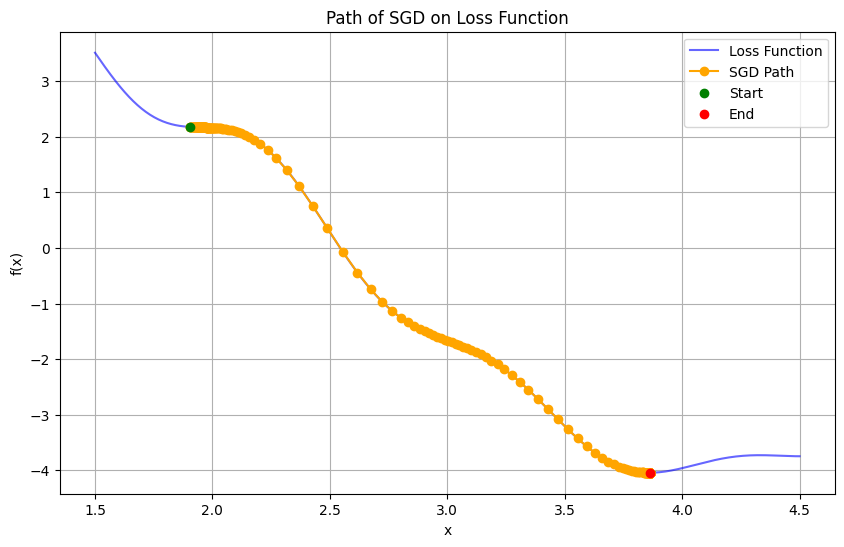

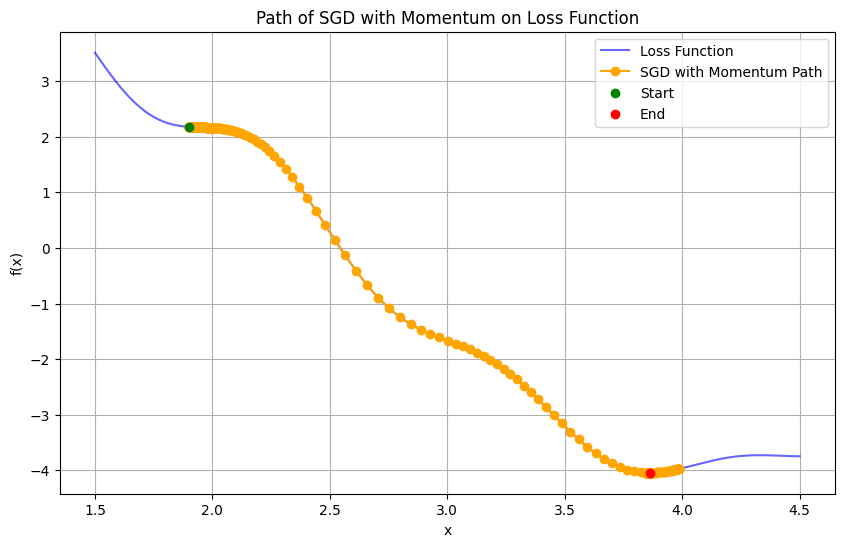

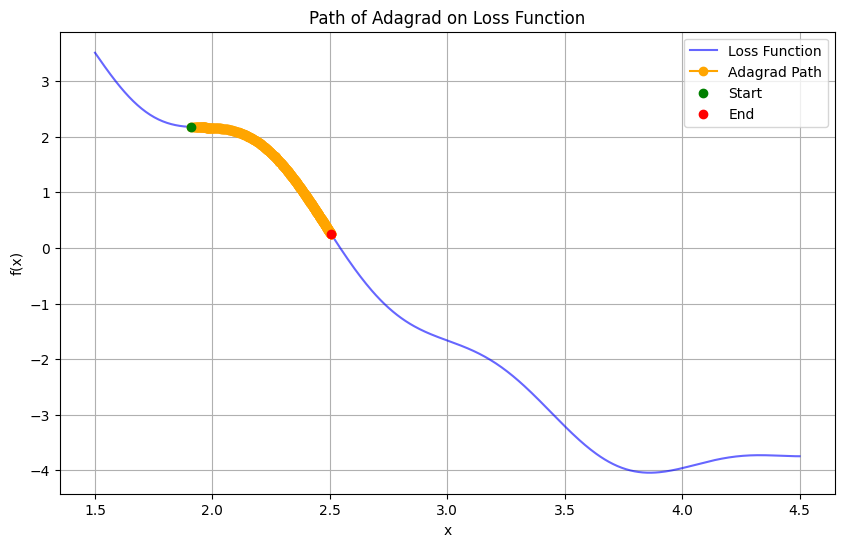

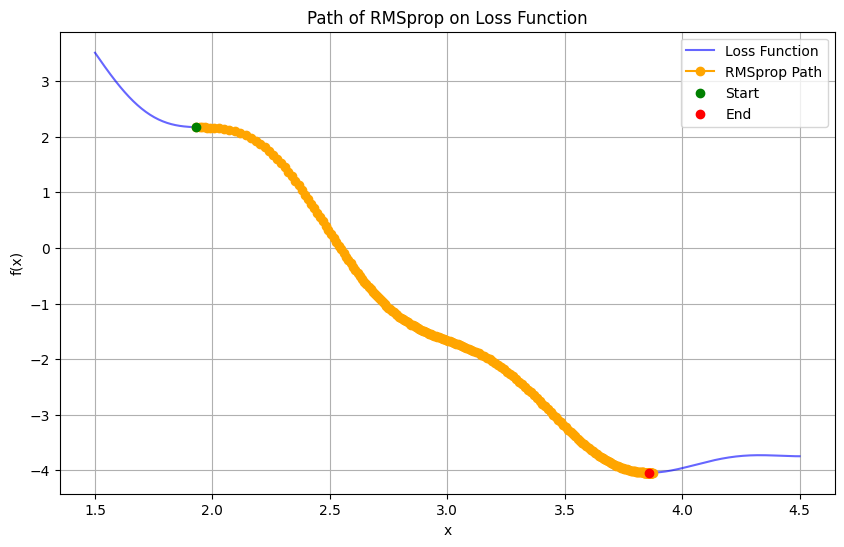

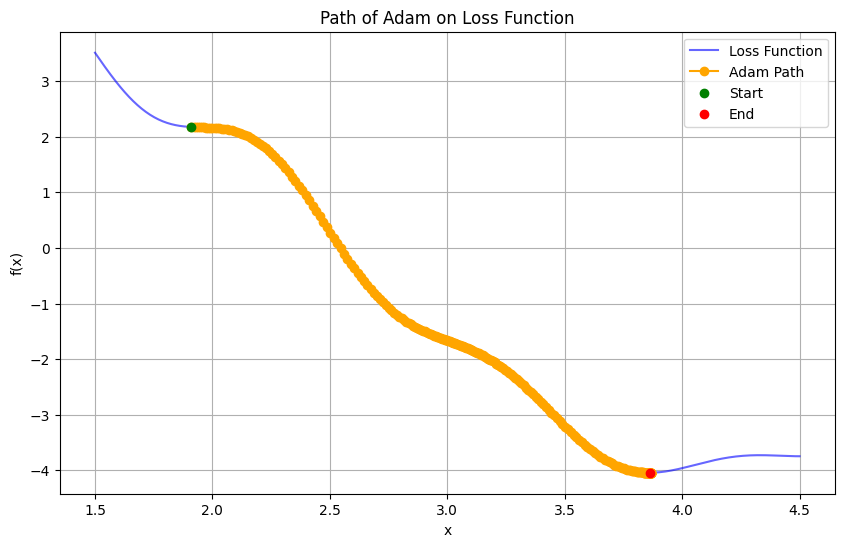

In [ ]:

x_vals = np.linspace(1.5, 4.5, 500)
y_vals = loss_function(x_vals)

for name, path in convergence_paths.items():
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Loss Function', color='blue', alpha=0.6)
    plt.plot(path['x'], path['f(x)'], marker='o', label=f'{name} Path', linestyle='-', color='orange')
    plt.scatter([path['x'][0]], [path['f(x)'][0]], color='green', label='Start', zorder=5)
    plt.scatter([path['x'][-1]], [path['f(x)'][-1]], color='red', label='End', zorder=5)
    plt.title(f'Path of {name} on Loss Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()

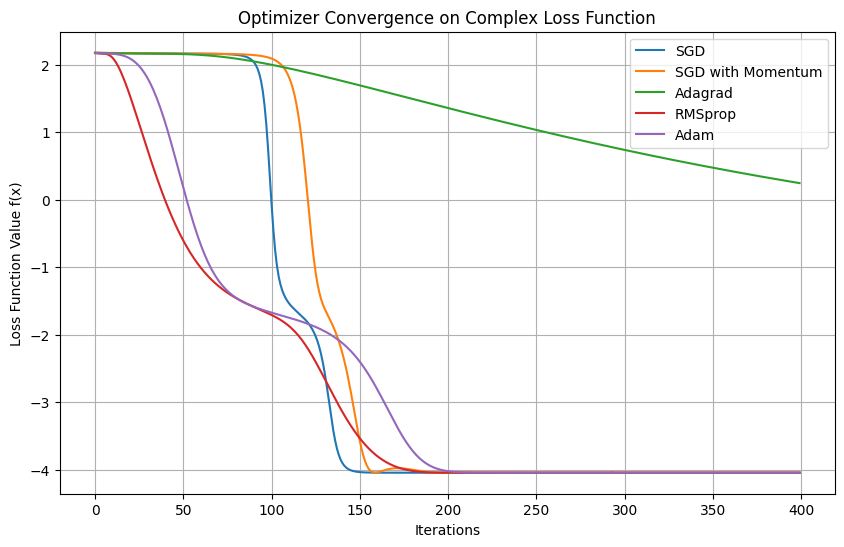

In [ ]:
# Plot the convergence path for each optimizer
plt.figure(figsize=(10, 6))
for name, path in convergence_paths.items():
    plt.plot(path['f(x)'], label=name)

# Labels and legend
plt.xlabel("Iterations")
plt.ylabel("Loss Function Value f(x)")
plt.title("Optimizer Convergence on Complex Loss Function")
plt.legend()
plt.grid(True)
plt.show()

# Build a Model for the MNIST Dataset

In this section, your goal is to build a machine learning model that achieves an accuracy of **98% or higher** on the MNIST dataset. The MNIST dataset contains images of handwritten digits (0-9), and it’s a popular benchmark for evaluating classification models. To achieve this accuracy threshold, you’ll need to carefully design, train, and evaluate your model.

## Objective

Using only the provided libraries, you will:
1. **Load and preprocess** the MNIST data.
2. **Build** a neural network model suitable for image classification.
3. **Train** the model on the training data, monitoring accuracy and adjusting parameters as needed.
4. **Evaluate** the model on the test data to ensure it meets the required accuracy threshold.

Each cell in this section will guide you through these steps, with descriptions explaining the purpose of each step and what you need to do. Follow the instructions carefully, and use your understanding of neural networks to achieve the best possible performance on the MNIST dataset.

## Step 1: Loading and Preprocessing the MNIST Dataset

In this cell, you will:
1. **Load the MNIST dataset**: This dataset consists of 28x28 grayscale images of handwritten digits (0–9). Each image is represented as a 28x28 array of pixel values, and each label corresponds to the digit in the image.
   
2. **Define key variables**:
   - `num_classes`: The number of unique classes in the dataset (0–9).
   - `input_shape`: The shape of each image, which will help in defining the model's input layer.
   - `num_features`: The total number of pixels in each image, useful if you need to flatten the images into a 1D vector for the model.

3. **Normalize the pixel values**: The pixel values are divided by 255 to rescale them from their original range of 0–255 to a range of 0–1. This normalization step helps the model converge faster and improves performance.

4. **One-hot encode the labels**: Convert the labels into a one-hot encoded format. Instead of representing the labels as single integers (e.g., `3` for the digit 3), one-hot encoding represents each label as a binary vector (e.g., `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]` for the digit 3). This format is commonly used for multi-class classification problems and is required for training neural networks effectively.

By the end of this cell, your data will be ready for building and training the model.

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]
num_features = np.prod(input_shape)

# Normalize the pixel values and one-hot encode the labels
# TODO: Normalize pixel values to the range [0, 1]
x_train, x_test = (x_train / 255), (x_test / 255)
# TODO: Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Step 2: Building and Optimizing Your Model for MNIST

Your goal in this cell is to build a neural network model that achieves an accuracy of **98% or higher** on the MNIST dataset. To achieve this, you will need to:
1. **Define the model architecture**: You can experiment with the number of layers, units in each layer, and other architectural details to optimize your model’s performance.
2. **Choose an optimizer**: Test different optimizers (e.g., SGD, Adagrad, RMSprop, Adam) and fine-tune their hyperparameters (such as learning rate, momentum, etc.).
3. **Search for optimal hyperparameters**: You can use hyperparameter tuning methods such as **Hyperband**, **Random Search**, or **Bayesian Optimization** to find the best hyperparameter values efficiently.

### Available Tuning Options

- **Hyperband**: Efficiently finds the best hyperparameters by exploring a wide range and narrowing down based on performance.
- **Random Search**: Tries a random combination of hyperparameters within defined ranges.
- **Bayesian Optimization**: Uses a probabilistic approach to find the best parameters based on past evaluations.

### Final Task

Once you’ve achieved a model with over **98% accuracy** on the MNIST test set:
1. **Print the optimal hyperparameters** for your best-performing model.
2. **Build and compile the model** using these optimal parameters.
3. **Display the model summary** at the end of the cell.

By following this approach, you will gain insights into how different optimizers and model configurations impact performance, ultimately helping you build an effective and efficient model for the MNIST dataset.

In [ ]:
def create_model(optimizer='adam', learning_rate=0.001, hidden_units=128):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'sgd':
        optimizer_obj = SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        optimizer_obj = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_obj = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        optimizer_obj = Adagrad(learning_rate=learning_rate)
    else:
        raise ValueError(f"Optimizer {optimizer} not recognized!")

    model.compile(optimizer=optimizer_obj, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
def create_model_with_hyperparameters(hyperparameter):
    optimizer = hyperparameter.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = hyperparameter.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
    num_units = hyperparameter.Int('num_units', min_value=32, max_value=512, step=32)

    model = create_model(optimizer=optimizer, learning_rate=learning_rate, hidden_units=num_units)

    return model

tuner = kt.Hyperband(
    create_model_with_hyperparameters,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

In [ ]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best optimizer: {best_hyperparameters.get('optimizer')}")
print(f"Best learning rate: {best_hyperparameters.get('learning_rate')}")
print(f"Best number of units: {best_hyperparameters.get('num_units')}")

Trial 30 Complete [00h 01m 47s]
val_accuracy: 0.9398999810218811

Best val_accuracy So Far: 0.9800000190734863
Total elapsed time: 00h 24m 27s
Best optimizer: adam
Best learning rate: 0.001337060636223389
Best number of units: 512


## Step 3: Training, Evaluating, and Saving Your Model

In this part, you will:
1. **Train the Model**: Train your model on the MNIST training data for a specified number of epochs. The `fit` function will show the training and validation accuracy/loss at each epoch, allowing you to monitor the model’s progress.
   
2. **Make Predictions**: Once training is complete, generate predictions on the test data. While not required for accuracy calculation, this can be useful if you want to further analyze the model’s predictions.

3. **Evaluate the Model**: Use the `evaluate` function to calculate the model's loss and accuracy on the test set. This will give you an objective measure of the model’s performance. Remember, the goal is to achieve **98% or higher** accuracy.

4. **Save the Model**: After achieving satisfactory accuracy, save your model to disk for later use. This allows you to load the trained model in the future without retraining.

### Important Notes:
- **Training Parameters**: You can adjust the number of epochs or batch size in the `fit` function if needed to reach the required accuracy.
- **Model Storage**: The saved model file (`mnist_model.keras`) will store the entire model structure and weights, enabling you to load and use it later without needing to rebuild or retrain.

By completing these steps, you will have a fully trained and saved model capable of achieving high accuracy on the MNIST dataset.

In [ ]:
best_model = tuner.get_best_models()[0]
history = best_model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
)

test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

if test_accuracy >= 0.98:
    best_model.save('mnist_model.keras')
    print("Model saved successfully!")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accuracy: 0.9774 - val_loss: 0.1128
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9820 - val_loss: 0.0925
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9760 - val_loss: 0.1282
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9824 - val_loss: 0.0969
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9793 - val_loss: 0.1150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9823 - val_loss: 0.1124
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9977 - loss: 0.0064 - val_accuracy: 0.9803 - val_loss: 0.1343
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9969 - loss: 0

## Step 4: Visualizing Model Performance

In this final step, you will visualize your model's performance using a series of plots. These visualizations will help you understand how well the model performed, identify areas for potential improvement, and interpret any misclassifications.

1. **Plot the Training History**: This plot shows the training and validation accuracy over each epoch. By examining this plot, you can see how the model's accuracy improved with each epoch and check if there’s any overfitting (e.g., if training accuracy is much higher than validation accuracy).

2. **Plot the Confusion Matrix**: The confusion matrix provides a detailed view of the model's performance across each digit class (0–9). Each cell in the matrix shows the number of true vs. predicted classifications for each class. This helps you identify specific digits that the model struggles to classify correctly, as they may have higher misclassification counts.

3. **Visualize Misclassified Images**: In this grid, you’ll see some of the images that were incorrectly classified by the model. Each image shows the true label and the predicted label. Examining these misclassified examples can give you insight into where the model might have difficulty, such as digits that look similar (e.g., 3 and 5). It can also help you decide if additional data processing or model adjustments are needed.

### Tips for Interpretation:
- **Training History**: If the validation accuracy plateaus early or diverges significantly from training accuracy, consider revisiting your model architecture or hyperparameters.
- **Confusion Matrix**: Look for off-diagonal cells with high values, as these indicate common misclassifications.
- **Misclassified Images**: Understanding these cases can guide you in tuning or improving your model, such as adding more data for challenging classes.

By analyzing these plots, you’ll gain a deeper understanding of your model’s strengths and weaknesses on the MNIST dataset.

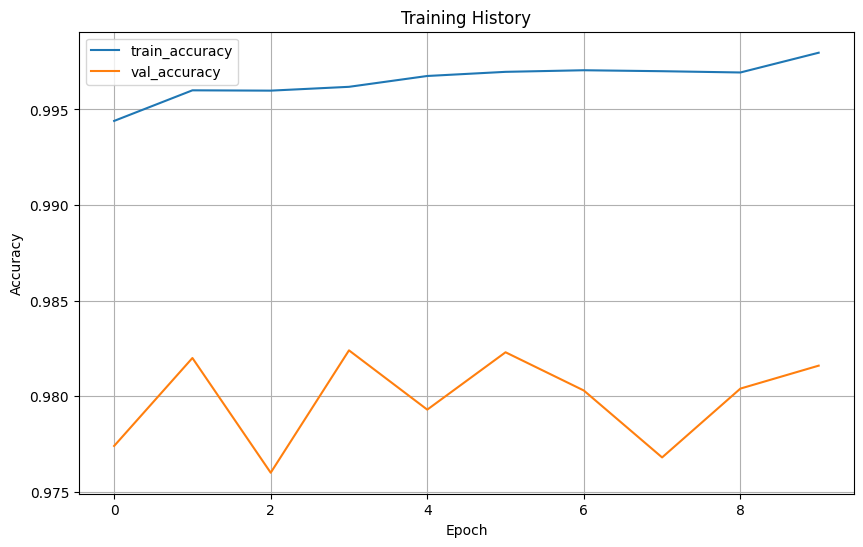

In [ ]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


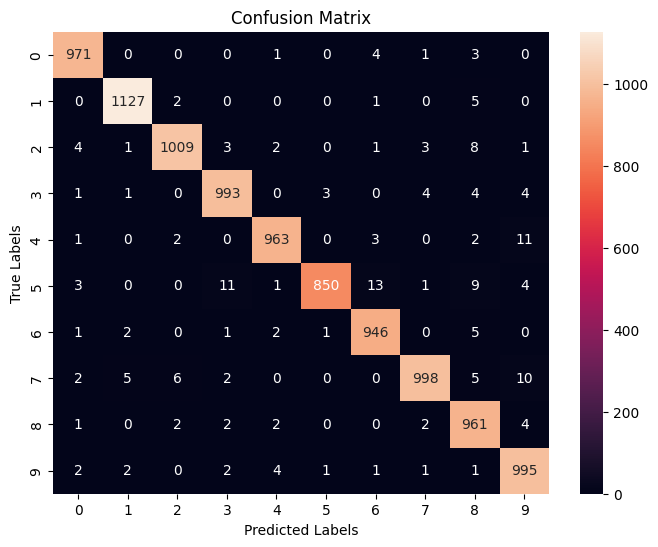

In [ ]:
# Plot the confusion matrix heatmap
# TODO: Compute the confusion matrix using the true labels and predicted labels.
predicted_probs = best_model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

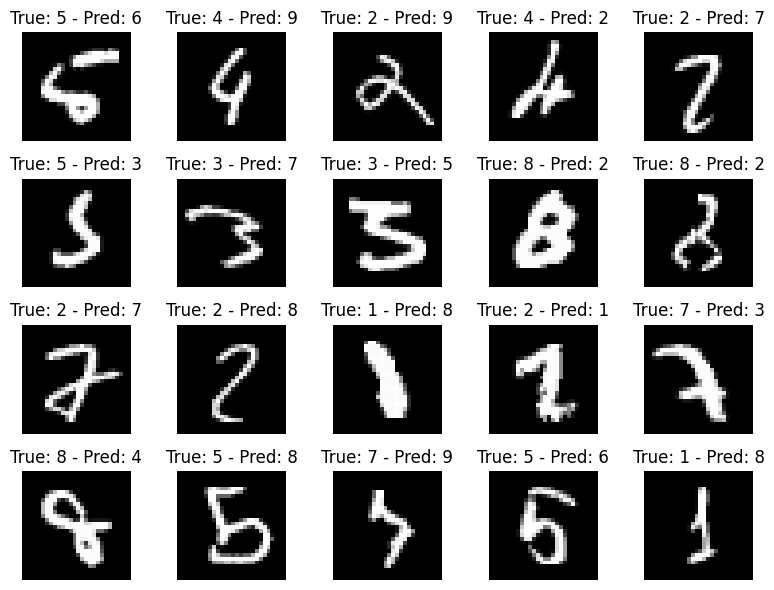

In [ ]:
# Visualize the model incorrectly classified images on 4x5 grid
# TODO: Find the indices of incorrectly classified images.
incorrect_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(8, 6))
for i, idx in enumerate(incorrect_indices[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[idx])} - Pred: {np.argmax(predicted_probs[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()